# CNN

# 1. PREPROCESSING DATA

#LOAD LIBRARIES

In [1]:
# load libraries
import os
import numpy as np
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Lambda
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load Dataset  

In [2]:
dir = '../dataset'
dir_train = f'{dir}/train'
dir_valid = f'{dir}/validation'

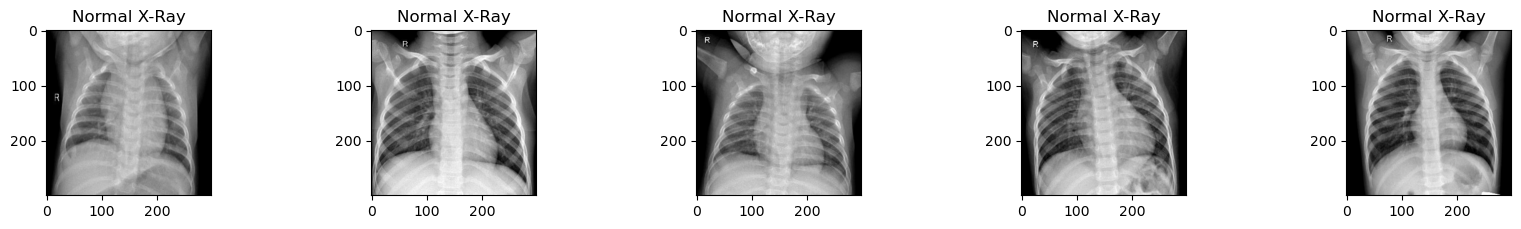

In [3]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(5, 5, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # Normal
    dir_img = f'{dir_train}/0_Normal/Normal ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('Normal X-Ray')

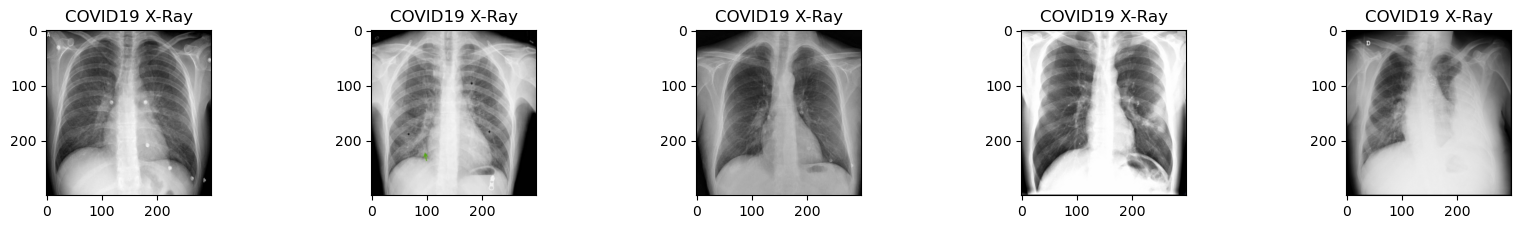

In [4]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(5, 5, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # COVID-19
    dir_img = f'{dir_train}/1_Covid19/COVID-19 ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('COVID19 X-Ray')

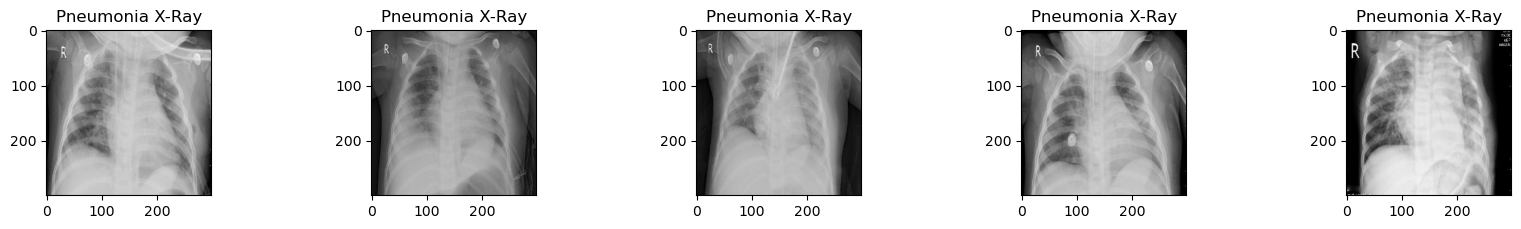

In [5]:
plt.figure(figsize=(20 , 15))
for i in np.arange(1,6):
    plt.subplot(5, 5, i)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    # Pneumonia-Bacterial
    dir_img = f'{dir_train}/2_Pneumonia/Pneumonia-Bacterial ({i}).jpg'
    img = cv2.imread(dir_img)
    plt.imshow(img) 
    plt.title('Pneumonia X-Ray')

# ADJUST DIMENSION

In [6]:
IMAGE_SIZE = (128, 128)

# DEFINE MODEL

In [8]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 kelas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Data augmentation & scaling

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Training

In [10]:
# Load 
train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dir_valid,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

Found 7367 images belonging to 3 classes.
Found 1841 images belonging to 3 classes.


# OPTIMIZE TRAINING

In [11]:
# Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[]
)

Epoch 1/15


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


461/461 ━━━━━━━━━━━━━━━━━━━━ 237s 503ms/step - accuracy: 0.6626 - loss: 0.7281 - val_accuracy: 0.8800 - val_loss: 0.3090
Epoch 2/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 219s 472ms/step - accuracy: 0.8575 - loss: 0.3909 - val_accuracy: 0.8827 - val_loss: 0.3038
Epoch 3/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 221s 478ms/step - accuracy: 0.8754 - loss: 0.3332 - val_accuracy: 0.9039 - val_loss: 0.2829
Epoch 4/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 245s 530ms/step - accuracy: 0.8923 - loss: 0.2938 - val_accuracy: 0.8957 - val_loss: 0.3247
Epoch 5/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 304s 657ms/step - accuracy: 0.8947 - loss: 0.2958 - val_accuracy: 0.9169 - val_loss: 0.2265
Epoch 6/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 364s 783ms/step - accuracy: 0.9040 - loss: 0.2562 - val_accuracy: 0.9180 - val_loss: 0.2354
Epoch 7/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 268s 580ms/step - accuracy: 0.9086 - loss: 0.2504 - val_accuracy: 0.9169 - val_loss: 0.2526
Epoch 8/15
461/461 ━━━━━━━━━━━━━━━━━━━━ 357s 772ms/step - accuracy: 0.9235 - loss: 0.22

# PLOT

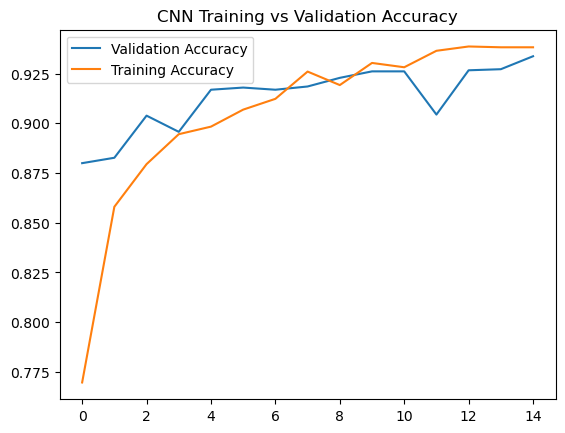

In [12]:
# Plot Training & Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()

In [29]:
y_true = []
y_pred = []

# Hitung total batch yang dibutuhkan
steps = len(val_generator)

for i in range(steps):
    images, labels = next(val_generator)  # ambil 1 batch
    preds = model.predict(images)

    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

              precision    recall  f1-score   support

      Normal       0.90      0.95      0.92       654
     Covid19       0.99      0.91      0.95       256
   Pneumonia       0.95      0.93      0.94       931

    accuracy                           0.93      1841
   macro avg       0.94      0.93      0.94      1841
weighted avg       0.94      0.93      0.93      1841



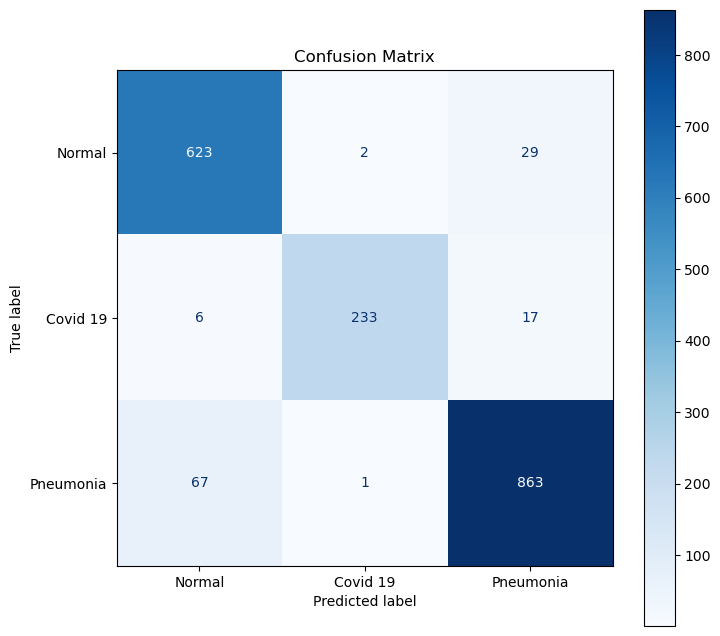

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

# Daftar nama kelas
class_names = ['Normal', 'Covid 19', 'Pneumonia']  # sesuaikan dengan dataset kamu

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Covid19', 'Pneumonia']))

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
plt.title('Confusion Matrix')
plt.show()

# Predict New Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


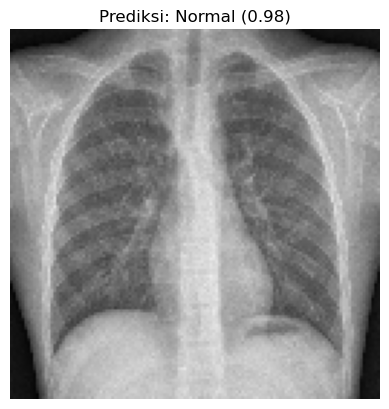

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Daftar kelas (urutan sama seperti pada training)
class_names = ['Normal', 'Covid 19', 'Pneumonia']

def predict_custom_image(image_path):
    # Load dan ubah ukuran gambar sesuai input model
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

predict_custom_image("../dataset/normal.jpeg")